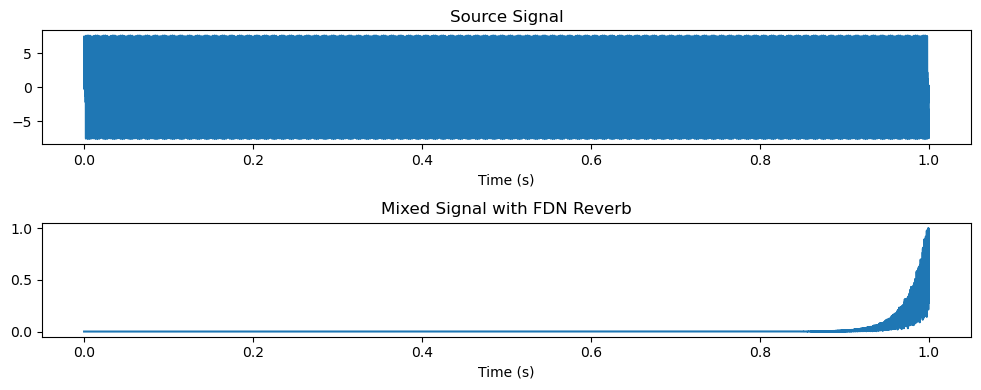

In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# Parameters
sample_rate = 44100  # Sample rate (Hz)
duration = 1.0  # Duration of the audio (seconds)
frequency = 440.0  # Base frequency of the source signal (Hz)
num_harmonics = 10  # Number of harmonics to generate
num_delay_lines = 4  # Number of delay lines in the FDN
delay_lengths = [0.0297, 0.0371, 0.0419, 0.0437]  # Delay lengths of the delay lines (seconds)
gain_matrix = np.array([[0.45, 0.5, 0.35, 0.3],
                        [0.35, 0.45, 0.3, 0.25],
                        [0.4, 0.3, 0.35, 0.2],
                        [0.25, 0.35, 0.4, 0.3]])  # Gain matrix of the FDN

# Create time axis
t = np.arange(0, duration, 1 / sample_rate)

# Generate source signal using additive synthesis
source_signal = np.zeros_like(t)
for harmonic in range(1, num_harmonics + 1):
    source_signal += np.sin(2 * np.pi * harmonic * frequency * t)

# Initialize the mixed signal as the source signal
mixed_signal = source_signal.copy()

# Initialize delay line buffers
delay_buffers = [np.zeros_like(t) for _ in range(num_delay_lines)]

# Apply the FDN reverb
for i in range(len(t)):
    for j in range(num_delay_lines):
        delay_samples = int(delay_lengths[j] * sample_rate)
        delayed_sample = delay_buffers[j][i - delay_samples] if i >= delay_samples else 0.0
        for k in range(num_delay_lines):
            mixed_signal[i] += gain_matrix[j][k] * delayed_sample
    for j in range(num_delay_lines):
        delay_buffers[j][i] = mixed_signal[i]

# Normalize the mixed signal
mixed_signal /= np.max(np.abs(mixed_signal))

# Save the mixed signal as an audio file
sf.write("fdn_reverb_dataset.wav", mixed_signal, sample_rate)

# Plot the source signal and mixed signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, source_signal)
plt.title("Source Signal")
plt.xlabel("Time (s)")
plt.subplot(2, 1, 2)
plt.plot(t, mixed_signal)
plt.title("Mixed Signal with FDN Reverb")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()
